##**importing** **required** **modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [2]:
df=pd.read_csv("/content/drive/MyDrive/deep learning/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) italicized text italicized text

In [5]:
df.describe().T       

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


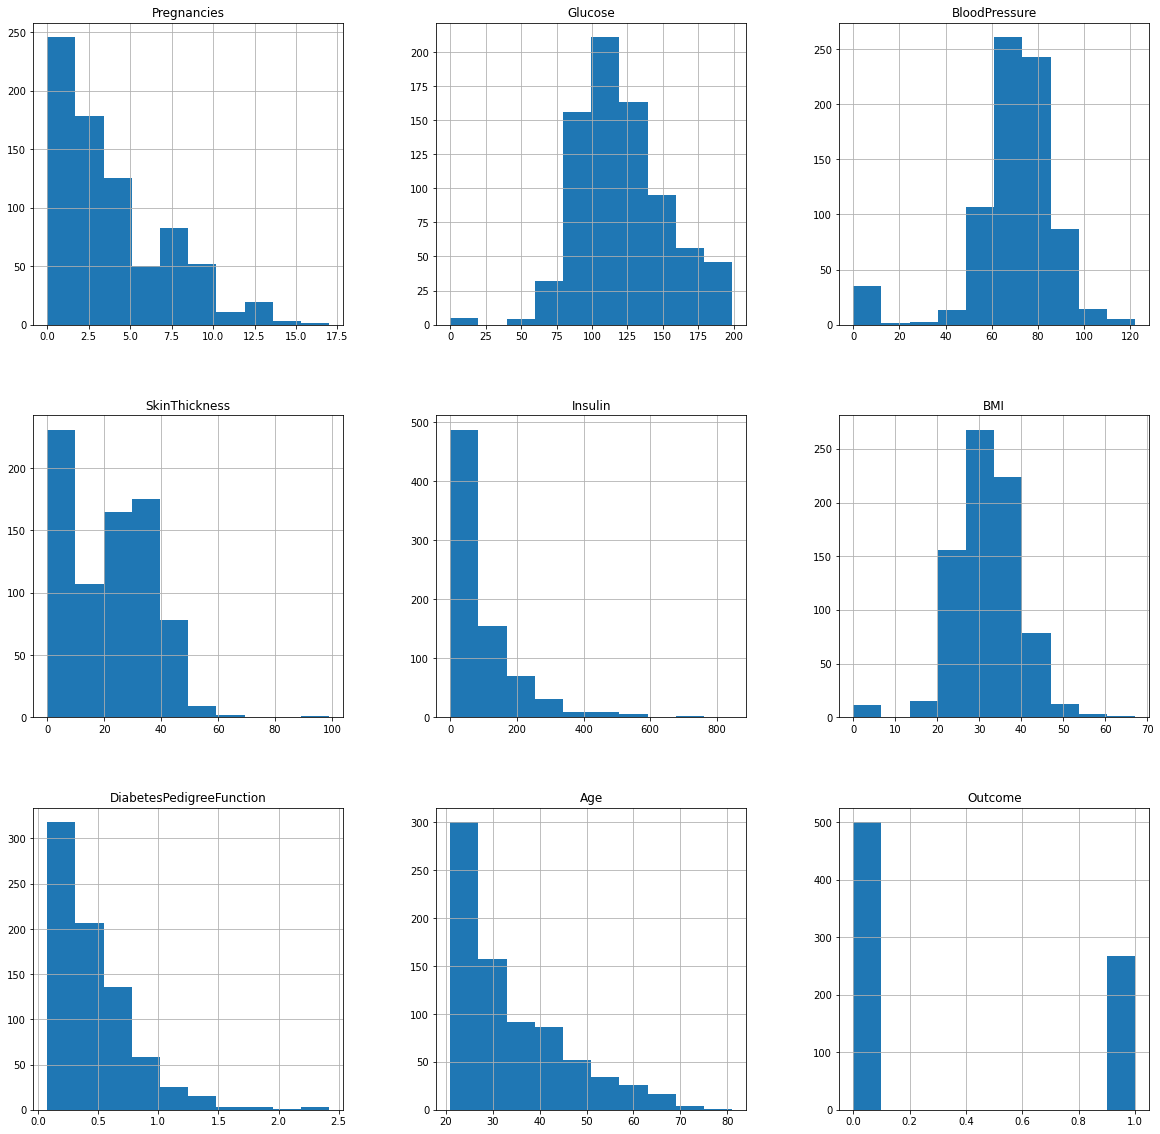

In [6]:
p=df.hist(figsize = (20,20))

In [7]:
df.isnull().any() # no null values

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
df.head(20) # no null values but some values are zero which is almost count as null .

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


There are 9 variables in this dataset. Outcome is our target/ dependent variable. All are numeric variables. Outcome is a categorical variable and can have value either 0 or 1. It can be seen that there is no NaN value for any of the variables.

But we can see Glucose, BloodPressure, SkinThickness, Insulin, BMI Features have minimum value 0. That does not make any sense. We will check each feature one by one. **bold text**

In [9]:
df["Outcome"].value_counts()#It can be seen that our dataset has imbalanced class. We have 500 observations of claas 0 and 268 observations for Class 1.

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [11]:
df["Age"].value_counts()# age staring with 21

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [12]:
# checking somme feature in detail

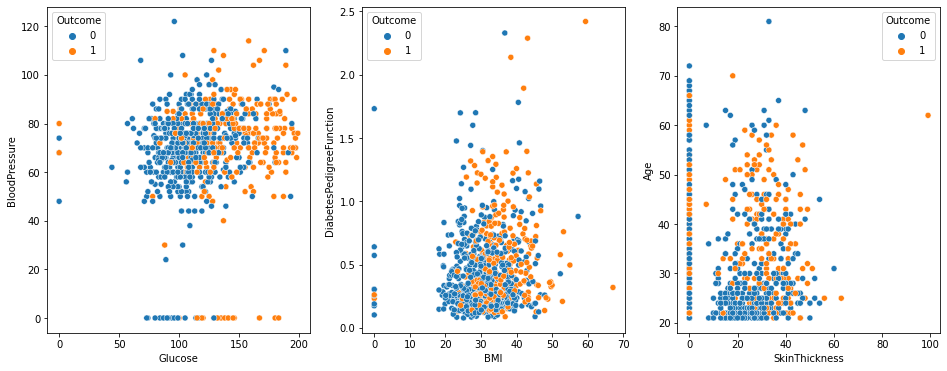

In [13]:
plt.figure(figsize=[16,6])
plt.subplot(1,3,1)
sns.scatterplot(data= df, x= 'Glucose', y='BloodPressure', hue='Outcome')
plt.subplot(1,3,2)
sns.scatterplot(data= df, x= 'BMI', y='DiabetesPedigreeFunction', hue='Outcome')
plt.subplot(1,3,3)
sns.scatterplot(data= df, x= 'SkinThickness', y='Age', hue='Outcome')
plt.show()

It can be seen taht there is somewhat positive linear relation between Insulin and Glucose. Same with Age and Pregnancies. If this relation is very strong or not that we can see later on using correlation heatmap.

From the scatterplots it can be seen that observations of outcome 0 and 1 are almost overplapping with each other in case of most of the features. Only For Glucose, we can see if Glucose is below 90 then there is very low chance of outcome 1 and if Glucose is above 150 then there is a very high chance of outcome to be 1.

Again if BMI is below 25 then there is almost no observation having outcome =1 where if BMI is more than 25 then we can see both 0 and 1 in outcome.

Also it can be seen that the probablity of outcome =1 when age<25 is lesser than the when age > 25.

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


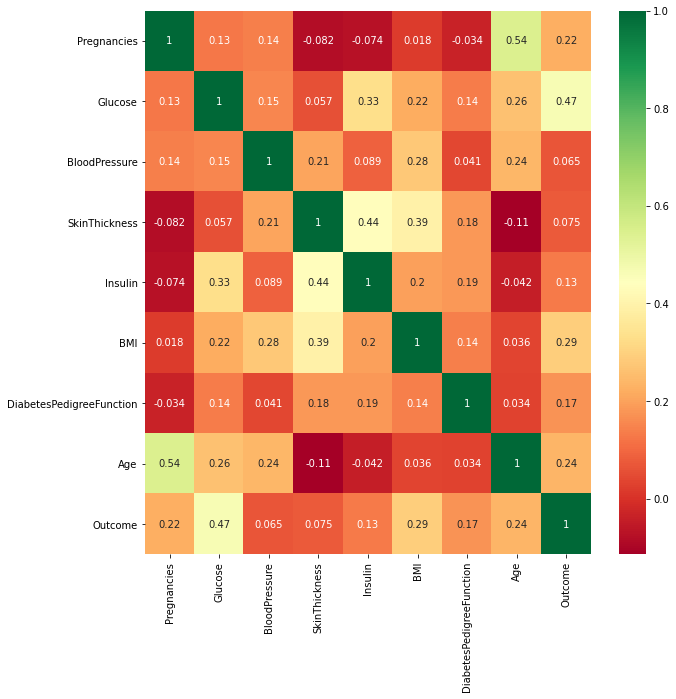

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn');

We can see that there is no very strong linear relations between any of the variables. There are medium linear relations between Age and Number of Pregnancies, BMI and SkinThickness, Insulin and Glucos

In [16]:
col=["Glucose",	"BloodPressure"	,"SkinThickness",	"Insulin"	,"BMI"]

In [17]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [18]:
df['Glucose'].mean(),df['Glucose'].median()

(120.89453125, 117.0)

In [19]:
df['BloodPressure'].mean(),df['BloodPressure'].median()

(69.10546875, 72.0)

In [20]:
df['SkinThickness'].mean(),df['SkinThickness'].median()

(20.536458333333332, 23.0)

In [21]:
df['BMI'].mean(),df['BMI'].median()

(31.992578124999977, 32.0)

In [22]:
df['Insulin'].mean(),df['Insulin'].median()

(79.79947916666667, 30.5)

In [23]:
# all above col are almost normally distributed lets replace all with mean value 

In [24]:
for i in col:
  df[i].replace(0,df[i].mean(),inplace=True)

In [25]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [26]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


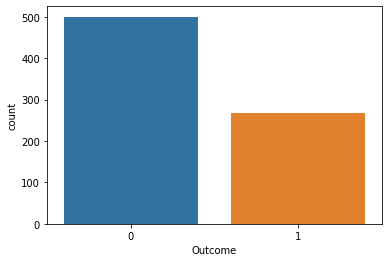

In [27]:
# leta check count\
sns.countplot(df['Outcome'],label="Count");

In [28]:
# lets ttrain the data

x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [29]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.3,stratify=y)

In [30]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [31]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
mlp = MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
print("Accuracy on training set: {:.2f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(x_test, y_test)))

Accuracy on training set: 0.74
Accuracy on test set: 0.72


The accuracy of the Multilayer perceptrons (MLP) is not as good as the other models at all, this is likely due to scaling of the data. Deep learning algorithms also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. Now I will re-scale our data so that it fulfills these requirements to predict diabetes with a good accuracy.

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y)
print(f"Before = {counter}")

smt = SMOTE()
x, y = smt.fit_resample(x, y)

counter = Counter(y)
print(f"After = {counter}")

Before = Counter({0: 500, 1: 268})
After = Counter({1: 500, 0: 500})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [37]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.3,stratify=y)

In [38]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
print("Accuracy on training set: {:.2f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(x_test, y_test)))

Accuracy on training set: 0.86
Accuracy on test set: 0.80


In [40]:
 #Increase the number of iterations, alpha parameter and add stronger parameters to the weights of the model:

In [41]:
mlp = MLPClassifier(max_iter=500, alpha=0.01, random_state=0)
mlp.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(x_test, y_test)))

Accuracy on training set: 0.886
Accuracy on test set: 0.820


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
y_hat=mlp.predict(x_test)

In [43]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [44]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       150
           1       0.80      0.86      0.83       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [45]:
print(roc_auc_score(y_test,y_hat))

0.82


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_hat)

0.82

In [48]:
# over sampling teachique helps to improve our accuracy score   upto 83. after that scalling data is important.

In [49]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(5, activation="relu", input_shape=(x.shape[1],)),
     tf.keras.layers.Dense(7, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")]
)

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [52]:
trained_model = model.fit(x_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
35/35 [==============================] - 1s 1ms/step - loss: 0.7572
Epoch 2/100
35/35 [==============================] - 0s 915us/step - loss: 0.7060
Epoch 3/100
35/35 [==============================] - 0s 922us/step - loss: 0.6763
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6670
Epoch 5/100
35/35 [==============================] - 0s 873us/step - loss: 0.6695
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6467
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6212
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6197
Epoch 9/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6061
Epoch 10/100
35/35 [==============================] - 0s 956us/step - loss: 0.5964
Epoch 11/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5874
Epoch 12/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5845
Epoch 13/100
35/35 [=========

In [53]:
trained_model.history["loss"]

[0.7274084091186523,
 0.6992875337600708,
 0.6800039410591125,
 0.6658051609992981,
 0.6540327668190002,
 0.6433805227279663,
 0.6328554153442383,
 0.6216193437576294,
 0.6099996566772461,
 0.5986673831939697,
 0.587985098361969,
 0.57784104347229,
 0.568397581577301,
 0.5595734715461731,
 0.5512239933013916,
 0.5435943007469177,
 0.5364945530891418,
 0.5300142765045166,
 0.5241376757621765,
 0.5188746452331543,
 0.5140464305877686,
 0.5096181631088257,
 0.5054822564125061,
 0.5019227862358093,
 0.4982609450817108,
 0.49509385228157043,
 0.4921557605266571,
 0.48948878049850464,
 0.487140953540802,
 0.48463401198387146,
 0.48218849301338196,
 0.4802055060863495,
 0.4782468378543854,
 0.4763718545436859,
 0.4747275710105896,
 0.4732103645801544,
 0.47195568680763245,
 0.47077903151512146,
 0.46961864829063416,
 0.4684334993362427,
 0.46730709075927734,
 0.46628880500793457,
 0.46527013182640076,
 0.4641491174697876,
 0.46319323778152466,
 0.46219849586486816,
 0.46132388710975647,
 0.46

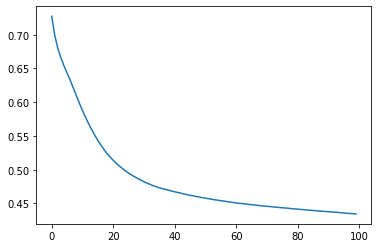

In [54]:
plt.plot(trained_model.history["loss"])
plt.show()

In [55]:
y_hat1=model.predict(x_test)

In [56]:
y_hat1

array([[0.4088116 ],
       [0.06511375],
       [0.25503826],
       [0.5622261 ],
       [0.41174874],
       [0.24306032],
       [0.50150144],
       [0.86661077],
       [0.9541749 ],
       [0.51944137],
       [0.01939034],
       [0.9066203 ],
       [0.9484614 ],
       [0.754974  ],
       [0.37713283],
       [0.56710327],
       [0.088918  ],
       [0.74847656],
       [0.4085448 ],
       [0.6146446 ],
       [0.07147017],
       [0.61945564],
       [0.48016614],
       [0.90047586],
       [0.34855705],
       [0.7965158 ],
       [0.10076258],
       [0.0293608 ],
       [0.00220433],
       [0.24202365],
       [0.00714749],
       [0.95331824],
       [0.00800338],
       [0.04544547],
       [0.22105807],
       [0.83169293],
       [0.30441487],
       [0.18825266],
       [0.97986877],
       [0.78978074],
       [0.82692647],
       [0.89650166],
       [0.8309659 ],
       [0.96029323],
       [0.5190284 ],
       [0.94509244],
       [0.13828453],
       [0.972

In [57]:
y_hat1 = np.where(y_hat >= 0.5, 1, 0)

In [58]:
y_hat1.flatten()

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [59]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       150
           1       0.80      0.86      0.83       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [60]:
print(roc_auc_score(y_test,y_hat1))

0.82


In [61]:
print(accuracy_score(y_test,y_hat1))

0.82


In [62]:
print(confusion_matrix(y_test,y_hat1))

[[117  33]
 [ 21 129]]


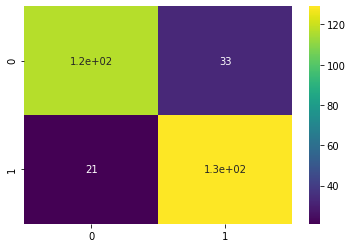

In [63]:
cm = confusion_matrix(y_test, y_hat1)
sns.heatmap(cm, annot=True, cmap='viridis');

In [64]:
tn,fp,fn,tp=confusion_matrix(y_test,y_hat1).ravel()

In [65]:
print(tp,fp)
print(fn,tn)

129 33
21 117


In [66]:
from sklearn.metrics import recall_score,f1_score 

In [67]:
print("recall for FN ",recall_score(y_test,y_hat1))

recall for FN  0.86


In [68]:
print("f1 score ",f1_score(y_test,y_hat1))

f1 score  0.826923076923077
